# imports

In [1]:
import keras
import os, skimage.io,matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from  tensorflow.python.keras.models import Sequential
from  tensorflow.python.keras.layers.core import Dense, Activation, Dropout,Flatten
from  tensorflow.python.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from  tensorflow.python.keras.utils import np_utils
from scipy.misc import toimage
from  tensorflow.python.keras.datasets import fashion_mnist
from  tensorflow.python.keras.optimizers import SGD, Adam,RMSprop
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import itertools
from time import time

Using TensorFlow backend.


# define helper functions

In [2]:
def printCatagory(Ydata):
    catagoryNum = [0,0,0,0,0,0,0,0,0,0]
    for data in Ydata:
        catagoryNum+=data
    print(catagoryNum)
import seaborn as sn
import pandas as pd
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# pre proccessing

In [3]:
(images, labels), (test_images, test_labels) = fashion_mnist.load_data()

num_pixels = images.shape[1] * images.shape[2]

images = images/255
test_images = test_images/255

images = np.expand_dims(images,3)
test_images = np.expand_dims(test_images,3)

#images_flat = images.reshape(images.shape[0], num_pixels).astype('float32')
#test_images_flat = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

labels = np_utils.to_categorical(labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = labels.shape[1]
train_images,validation_images,train_labels,validation_labels = train_test_split(images, labels, train_size=0.8, test_size=0.2,random_state=0)

print(classes)
print("train labels count")
printCatagory(train_labels)
print("validate label count")
printCatagory(validation_labels)
#reasonablelly even split

['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
train labels count
[4816. 4813. 4794. 4775. 4783. 4780. 4814. 4844. 4792. 4789.]
validate label count
[1184. 1187. 1206. 1225. 1217. 1220. 1186. 1156. 1208. 1211.]


# 1 conv layer

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2508900   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 2,510,230
Trainable params: 2,510,230
Non-trainable params: 0
____________________________________________________________

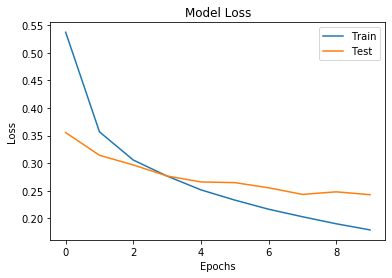

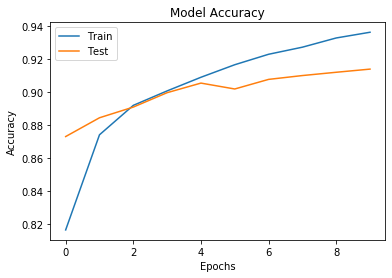

              precision    recall  f1-score   support

 T-shirt/Top       0.85      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.88      0.85      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.77      0.68      0.72      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



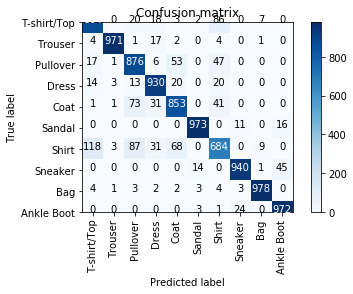

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=10, shuffle=True, batch_size=64, verbose=2)
scor = model.evaluate(test_images, test_labels)
print(scor)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

# 2 pooling vs larger conv filter

In [15]:
modelPool = Sequential()
modelPool.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))
modelPool.add(MaxPooling2D(pool_size=(2,2)))
modelPool.add(Conv2D(32, (3,3), activation='relu',padding = 'Same'))

modelPool.add(Flatten())

modelPool.add(Dense(100, activation='relu'))
modelPool.add(Dropout(0.3))
modelPool.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

modelPool.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
modelPool.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               627300    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 3s - loss: 0.6064 - acc: 0.7859 - val_loss: 0.3964 - val_acc: 0.8589
Epoch 2/30
48000/48000 - 3s - loss: 0.3973 - acc: 0.8576 - val_loss: 0.3403 - val_acc: 0.8794
Epoch 3/30
48000/48000 - 3s - loss: 0.3506 - acc: 0.8750 - val_loss: 0.3117 - val_acc: 0.8874
Epoch 4/30
48000/48000 - 3s - loss: 0.3210 - acc: 0.8859 - val_loss: 0.2916 - val_acc: 0.8919
Epoch 5/30
48000/48000 - 3s - loss: 0.2965 - acc: 0.8921 - val_loss: 0.2733 - val_acc: 0.9021
Epoch 6/30
48000/48000 - 3s - loss: 0.2793 - acc: 0.8989 - val_loss: 0.2662 - val_acc: 0.9025
Epoch 7/30
48000/48000 - 3s - loss: 0.2619 - acc: 0.9055 - val_loss: 0.2625 - val_acc: 0.9045
Epoch 8/30
48000/48000 - 3s - loss: 0.2542 - acc: 0.9080 - val_loss: 0.2495 - val_acc: 0.9078
Epoch 9/30
48000/48000 - 3s - loss: 0.2418 - acc: 0.9130 - val_loss: 0.2521 - val_acc: 0.9089
Epoch 10/30
48000/48000 - 3s - loss: 0.2311 - acc: 0.9159 - val_loss: 0.2395 - val_acc: 0.9122
Epoch 11/

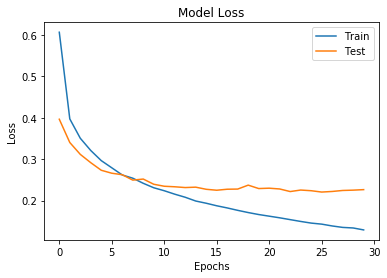

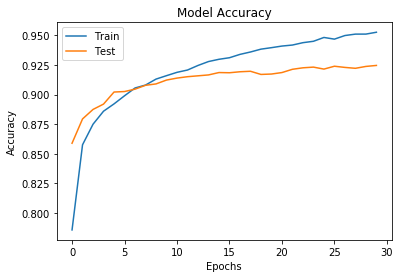

              precision    recall  f1-score   support

 T-shirt/Top       0.85      0.90      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.87      0.88      0.88      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.78      0.74      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



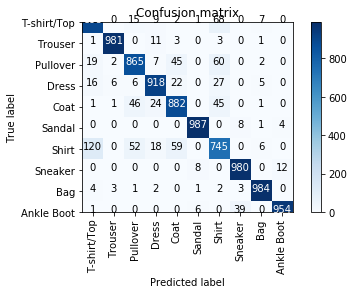

In [16]:
historyPool = modelPool.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=30, shuffle=True, batch_size=64, verbose=2)
scor = modelPool.evaluate(test_images, test_labels)
print(scor)
plt.plot(historyPool.history['loss'])
plt.plot(historyPool.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(historyPool.history['acc'])
plt.plot(historyPool.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = modelPool.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

In [22]:
modelLargeConv = Sequential()
modelLargeConv.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))
modelLargeConv.add(Conv2D(32, (6,6), activation='relu',padding = 'Same'))
modelLargeConv.add(Flatten())
modelLargeConv.add(Dense(100, activation='relu'))
modelLargeConv.add(Dropout(0.3))
modelLargeConv.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

modelLargeConv.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
modelLargeConv.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        36896     
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               2508900   
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 2,547,126
Trainable params: 2,547,126
Non-trainable params: 0
___________________________________________

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 5s - loss: 0.5060 - acc: 0.8209 - val_loss: 0.3546 - val_acc: 0.8733
Epoch 2/30
48000/48000 - 5s - loss: 0.3352 - acc: 0.8808 - val_loss: 0.2897 - val_acc: 0.8953
Epoch 3/30
48000/48000 - 5s - loss: 0.2859 - acc: 0.8956 - val_loss: 0.2692 - val_acc: 0.9017
Epoch 4/30
48000/48000 - 5s - loss: 0.2534 - acc: 0.9073 - val_loss: 0.2504 - val_acc: 0.9088
Epoch 5/30
48000/48000 - 5s - loss: 0.2272 - acc: 0.9159 - val_loss: 0.2449 - val_acc: 0.9106
Epoch 6/30
48000/48000 - 5s - loss: 0.2023 - acc: 0.9256 - val_loss: 0.2360 - val_acc: 0.9138
Epoch 7/30
48000/48000 - 5s - loss: 0.1815 - acc: 0.9331 - val_loss: 0.2356 - val_acc: 0.9160
Epoch 8/30
48000/48000 - 5s - loss: 0.1630 - acc: 0.9393 - val_loss: 0.2274 - val_acc: 0.9190
Epoch 9/30
48000/48000 - 5s - loss: 0.1450 - acc: 0.9456 - val_loss: 0.2343 - val_acc: 0.9188
Epoch 10/30
48000/48000 - 5s - loss: 0.1297 - acc: 0.9515 - val_loss: 0.2412 - val_acc: 0.9206
Epoch 11/

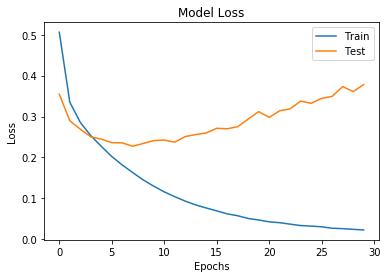

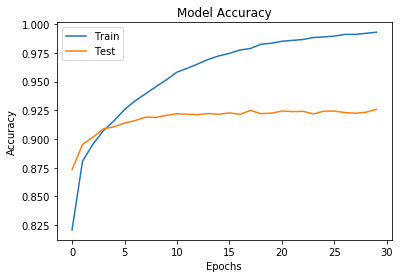

              precision    recall  f1-score   support

 T-shirt/Top       0.88      0.88      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.87      0.87      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.88      0.88      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.79      0.78      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



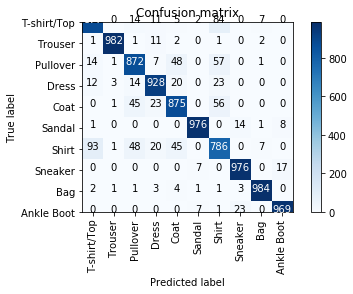

In [23]:
historyLargeConv = modelLargeConv.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=30, shuffle=True, batch_size=64, verbose=2)
scor = modelLargeConv.evaluate(test_images, test_labels)
print(scor)
plt.plot(historyLargeConv.history['loss'])
plt.plot(historyLargeConv.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(historyLargeConv.history['acc'])
plt.plot(historyLargeConv.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = modelLargeConv.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

# 3 pool conv layer numbers

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_11 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)             

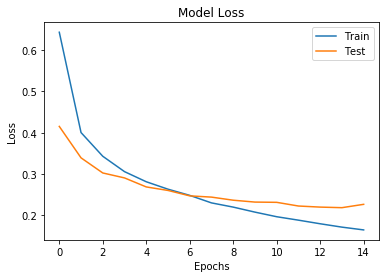

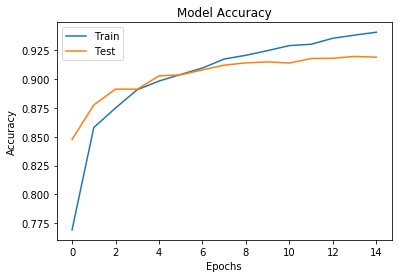

              precision    recall  f1-score   support

 T-shirt/Top       0.89      0.84      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.82      0.86      1000
       Dress       0.94      0.91      0.93      1000
        Coat       0.83      0.91      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.73      0.79      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.99      0.98      1000
  Ankle Boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



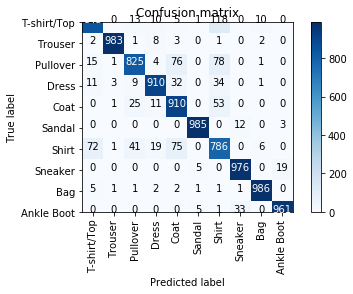

In [24]:
model2Pool = Sequential()
model2Pool.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))
model2Pool.add(MaxPooling2D(pool_size=(2,2)))
model2Pool.add(Conv2D(64, (3,3), activation='relu',padding = 'Same'))
model2Pool.add(MaxPooling2D(pool_size=(2,2)))
model2Pool.add(Conv2D(128, (3,3), activation='relu',padding = 'Same'))

model2Pool.add(Flatten())

model2Pool.add(Dense(100, activation='relu'))
model2Pool.add(Dropout(0.3))
model2Pool.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

model2Pool.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2Pool.summary()
history2Pool = model2Pool.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=15, shuffle=True, batch_size=64, verbose=2)
scor = model2Pool.evaluate(test_images, test_labels)
print(scor)
plt.plot(history2Pool.history['loss'])
plt.plot(history2Pool.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(history2Pool.history['acc'])
plt.plot(history2Pool.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = model2Pool.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 256)       

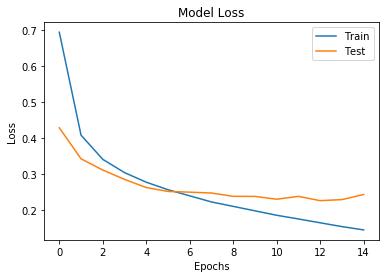

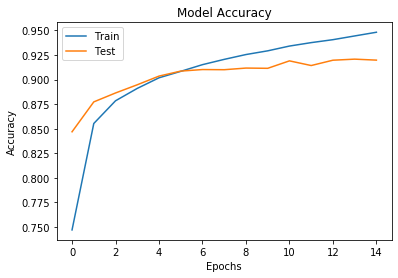

              precision    recall  f1-score   support

 T-shirt/Top       0.82      0.91      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.81      0.92      0.86      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.89      0.83      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.82      0.67      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle Boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



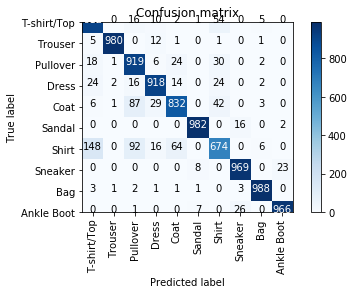

In [25]:
model3Pool = Sequential()
model3Pool.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))
model3Pool.add(MaxPooling2D(pool_size=(2,2)))
model3Pool.add(Conv2D(64, (3,3), activation='relu',padding = 'Same'))
model3Pool.add(MaxPooling2D(pool_size=(2,2)))
model3Pool.add(Conv2D(128, (3,3), activation='relu',padding = 'Same'))
model3Pool.add(MaxPooling2D(pool_size=(2,2)))
model3Pool.add(Conv2D(256, (3,3), activation='relu',padding = 'Same'))

model3Pool.add(Flatten())

model3Pool.add(Dense(100, activation='relu'))
model3Pool.add(Dropout(0.3))
model3Pool.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

model3Pool.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3Pool.summary()
history3Pool = model3Pool.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=15, shuffle=True, batch_size=64, verbose=2)
scor = model3Pool.evaluate(test_images, test_labels)
print(scor)
plt.plot(history3Pool.history['loss'])
plt.plot(history3Pool.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(history3Pool.history['acc'])
plt.plot(history3Pool.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = model3Pool.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

# 4. Number of conv layers. 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
flatten_17 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)             

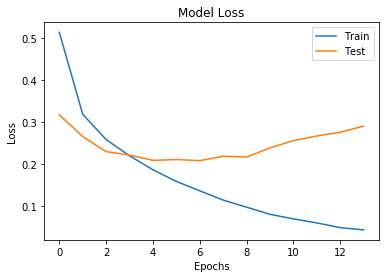

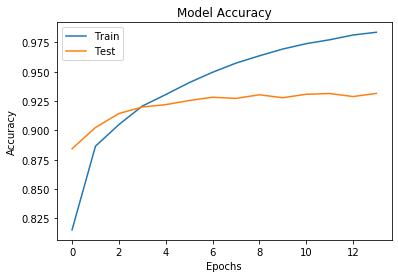

              precision    recall  f1-score   support

 T-shirt/Top       0.88      0.89      0.88      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.89      0.90      0.90      1000
       Dress       0.93      0.94      0.94      1000
        Coat       0.88      0.92      0.90      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.82      0.75      0.79      1000
     Sneaker       0.97      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.97      0.98      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



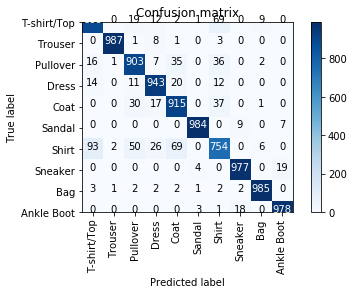

In [30]:
modelConvNum = Sequential()
modelConvNum.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))
modelConvNum.add(Conv2D(64, (3,3), activation='relu',padding = 'Same'))
modelConvNum.add(MaxPooling2D(pool_size=(2,2)))
modelConvNum.add(Conv2D(128, (3,3), activation='relu',padding = 'Same'))
modelConvNum.add(Conv2D(256, (3,3), activation='relu',padding = 'Same'))

modelConvNum.add(Flatten())

modelConvNum.add(Dense(100, activation='relu'))
modelConvNum.add(Dropout(0.3))
modelConvNum.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

modelConvNum.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
modelConvNum.summary()
historyConvNum = modelConvNum.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=14, shuffle=True, batch_size=64, verbose=2)
scor = modelConvNum.evaluate(test_images, test_labels)
print(scor)
plt.plot(historyConvNum.history['loss'])
plt.plot(historyConvNum.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(historyConvNum.history['acc'])
plt.plot(historyConvNum.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = modelConvNum.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_21 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 256)     

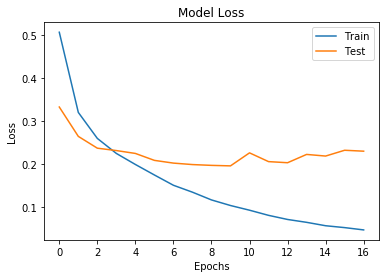

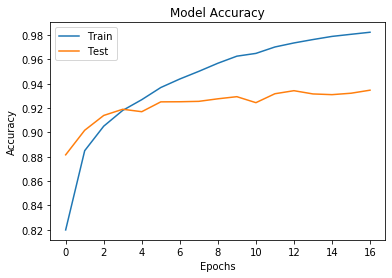

              precision    recall  f1-score   support

 T-shirt/Top       0.90      0.85      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.90      0.90      1000
       Dress       0.92      0.93      0.93      1000
        Coat       0.90      0.89      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.78      0.82      0.80      1000
     Sneaker       0.98      0.98      0.98      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.98      0.98      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



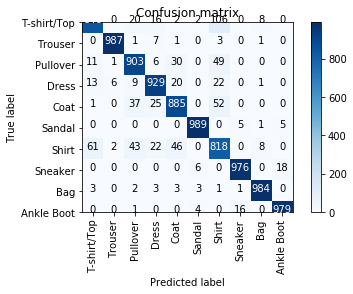

In [32]:
modelDropout = Sequential()
modelDropout.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))
modelDropout.add(Conv2D(64, (3,3), activation='relu',padding = 'Same'))
modelDropout.add(Dropout(0.3))
modelDropout.add(MaxPooling2D(pool_size=(2,2)))
modelDropout.add(Conv2D(128, (3,3), activation='relu',padding = 'Same'))
modelDropout.add(Conv2D(256, (3,3), activation='relu',padding = 'Same'))
modelDropout.add(Dropout(0.3))
modelDropout.add(Flatten())

modelDropout.add(Dense(100, activation='relu'))
modelDropout.add(Dropout(0.3))
modelDropout.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

modelDropout.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
modelDropout.summary()
historyDropout = modelDropout.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=17, shuffle=True, batch_size=64, verbose=2)
scor = modelDropout.evaluate(test_images, test_labels)
print(scor)
plt.plot(historyDropout.history['loss'])
plt.plot(historyDropout.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(historyDropout.history['acc'])
plt.plot(historyDropout.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = modelDropout.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 256)     

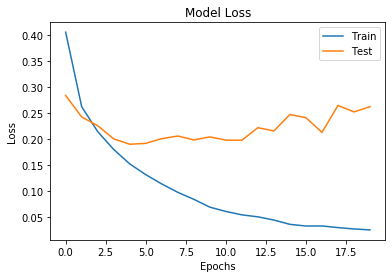

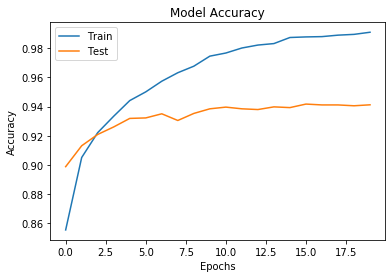

              precision    recall  f1-score   support

 T-shirt/Top       0.90      0.89      0.89      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.90      0.91      0.90      1000
       Dress       0.93      0.95      0.94      1000
        Coat       0.89      0.91      0.90      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.82      0.80      0.81      1000
     Sneaker       0.96      0.99      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle Boot       0.99      0.96      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



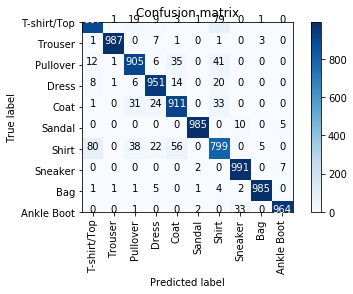

In [35]:
from tensorflow.python.keras.layers.normalization import BatchNormalization
modelBN = Sequential()
modelBN.add(Conv2D(32, (3,3), activation='relu',padding = 'Same',input_shape=(28,28,1)))
modelBN.add(Conv2D(64, (3,3), activation='relu',padding = 'Same'))
modelBN.add(Dropout(0.3))
modelBN.add(MaxPooling2D(pool_size=(2,2)))
modelBN.add(Conv2D(128, (3,3), activation='relu',padding = 'Same'))
modelBN.add(Conv2D(256, (3,3), activation='relu',padding = 'Same'))

modelBN.add(Dropout(0.3))

modelBN.add(Flatten())

modelBN.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)

modelBN.add(Dense(100, activation='relu'))
modelBN.add(Dropout(0.3))
modelBN.add(Dense(num_classes, activation ='softmax'))
opt = Adam(lr=3e-4, decay=1e-4)
#opt=RMSprop()

modelBN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
modelBN.summary()
historyBN = modelBN.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=20, shuffle=True, batch_size=64, verbose=2)
scor = modelBN.evaluate(test_images, test_labels)
print(scor)
plt.plot(historyBN.history['loss'])
plt.plot(historyBN.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(historyBN.history['acc'])
plt.plot(historyBN.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = modelBN.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes)
print(classification_report(Y_true, Y_pred_classes, target_names = classes))